In [36]:
from qibo.models import Circuit
from qibo import gates
import numpy as np
from qibo import models
import random, time
import qibo as qb
from IPython.display import Image

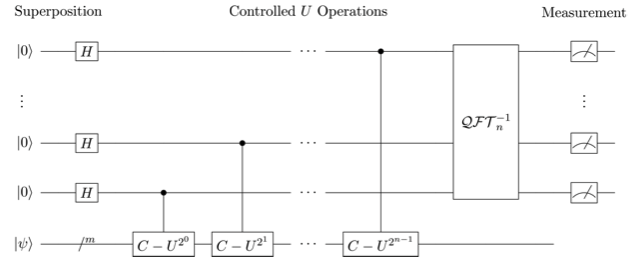

In [8]:
Image("qpe.png",width=6*10**2)

Prendiamo come operatore unitario U! con $\theta=\pi/4$

In [46]:
nqubit=5
c=Circuit(nqubit)
c.add(gates.X(nqubit-1))
for i in range(nqubit-1):
    c.add(gates.H(i))
    
#applico op unitario
for i in range(nqubit-1):
    for _ in range(2**(nqubit-2-i)):
        c.add(gates.U1(nqubit-1,np.pi/4).controlled_by(i))

#Inverse QFT
c.add(models.QFT(nqubit-1).invert().on_qubits(*range(nqubit-1)))

print('Circuit:\n',c.summary())

#measurements
for i in range(nqubit-1):
    c.add(gates.M(i))

result=c(nshots=1000)
print('\n\nResult:',result.frequencies())


Circuit:
 Circuit depth = 24
Total number of gates = 32
Number of qubits = 5
Most common gates:
cu1: 21
h: 8
swap: 2
x: 1


Result: Counter({'0010': 1000})


We see we get one result with certainty. We now need to divide our result by $2^{nqubit-1}$ to get $\theta$, $\theta_{exp}=1/8$